In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from scipy.stats import f_oneway
from scipy.stats import wilcoxon
from scipy.stats import shapiro

In [3]:
df = pd.read_csv("../data/DP_LIVE_20052022013442812.csv")

In [4]:
df

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,AGRLANDAREA,TOT,THND_HA,A,1985,485605.123,NaN
1,AUS,AGRLANDAREA,TOT,THND_HA,A,1986,485167.951,NaN
2,AUS,AGRLANDAREA,TOT,THND_HA,A,1987,471019.353,NaN
3,AUS,AGRLANDAREA,TOT,THND_HA,A,1988,472033.507,NaN
4,AUS,AGRLANDAREA,TOT,THND_HA,A,1989,460503.367,NaN
...,...,...,...,...,...,...,...,...
6776,EU27_2020,AGRLANDAREA,PASTURE,THND_HA,A,2015,49228.000,NaN
6777,EU27_2020,AGRLANDAREA,PASTURE,THND_HA,A,2016,49217.000,NaN
6778,EU27_2020,AGRLANDAREA,PASTURE,THND_HA,A,2017,49234.000,NaN
6779,EU27_2020,AGRLANDAREA,PASTURE,THND_HA,A,2018,50137.000,NaN


In [5]:
df["LOCATION"].unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'ARG', 'BRA', 'BGR', 'CHL', 'CHN', 'COL',
       'CRI', 'HRV', 'CYP', 'EST', 'IND', 'IDN', 'ISR', 'KAZ', 'LVA',
       'LTU', 'MLT', 'PHL', 'ROU', 'RUS', 'SVN', 'ZAF', 'UKR', 'VNM',
       'EU28', 'EU27_2020'], dtype=object)

In [6]:
df_ire = df[(df["LOCATION"]=="IRL")&(df["SUBJECT"]=="TOT")]

In [7]:
df_fra = df[(df["LOCATION"]=="FRA")&(df["SUBJECT"]=="TOT")]

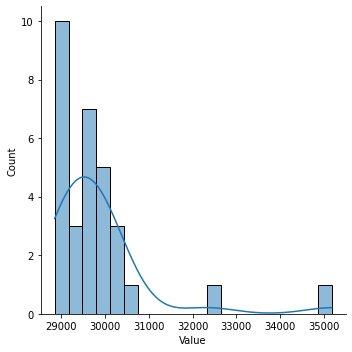

In [8]:
sns.displot(data=df_fra,x="Value",bins=20, kde=True)

#### Normality test

In [26]:
#p-value < 0.05 is not normal
shapiro(df_fra["Value"])

ShapiroResult(statistic=0.6243314743041992, pvalue=1.0572205866310469e-07)

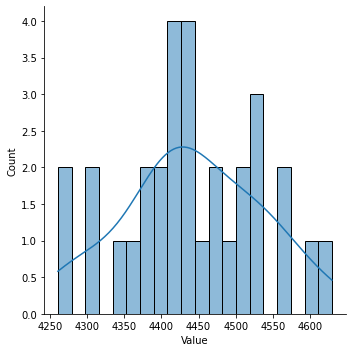

In [11]:
sns.displot(data=df_ire,x="Value",bins=20, kde=True)

#### Normality test

In [24]:
shapiro(df_ire["Value"])

ShapiroResult(statistic=0.9851990342140198, pvalue=0.9346866011619568)

In [ ]:
shapiro(df_ire["Value"])

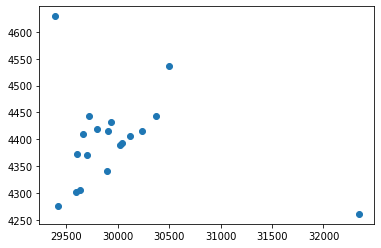

In [50]:
plt.scatter(x=df_fra["Value"].head(19), y=df_ire["Value"].head(19))

In [51]:
df_fra["Value"].describe()

count       31.000000
mean     29825.822581
std       1202.437640
min      28853.000000
25%      29101.000000
50%      29633.000000
75%      29976.750000
max      35178.000000
Name: Value, dtype: float64

In [37]:
df_ire["Value"].describe()

count      31.000000
mean     4441.422581
std        92.040943
min      4261.000000
25%      4390.600000
50%      4431.600000
75%      4513.500000
max      4629.000000
Name: Value, dtype: float64

In [52]:
pearsonr(df_fra["Value"].head(19), df_ire["Value"].head(19))

(-0.2270296415062096, 0.3499419213750439)

In [53]:
kendalltau(df_fra["Value"].head(19), df_ire["Value"].head(19))

KendalltauResult(correlation=0.23976608187134502, pvalue=0.16374964550644155)

In [54]:
spearmanr(df_fra["Value"].head(19), df_ire["Value"].head(19))

SpearmanrResult(correlation=0.2175438596491228, pvalue=0.37096957539137776)

In [55]:
f_oneway(df_fra["Value"].head(19), df_ire["Value"].head(19))

F_onewayResult(statistic=29374.30995467651, pvalue=5.02895105858283e-54)

In [56]:
wilcoxon(df_fra["Value"].head(19), df_ire["Value"].head(19))

WilcoxonResult(statistic=0.0, pvalue=3.814697265625e-06)